# PROYECTO INTEGRADOR

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Se tienen diferentes datos que recopilan la información de varias plataformas y de los videojuegos sacados a través del tiempo de vida útil de la plataforma. Entonces lo que se va a realizar es un análisis para determinar el mejor proyecto al cual se le puede realizar una campaña publicitaria para el año 2017.

Se va a realizar un análisis preliminar de las plataformas con mayor éxito en ventas. Los datos incluyen lo siguiente: nombre de los videojuegos, año de salida, plataforma, calificación que le dan los expertos y los usuarios, ganancias por videojuego para las regiones: NA, UE y JP. El trabajo consiste en analizar el comportamiento de cada videojuego y plataforma en relacion a las ventas globales y por región.

## Inicialización

In [ ]:
from scipy import stats as st
from scipy.stats import levene
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Cargar los datos

In [ ]:
game = pd.read_csv('/datasets/games.csv')

## Prepara los datos

In [ ]:
game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se observa que el dataframe esta compuesto por 16715 filas y 11 columnas, algunas tienen datos ausentes, los cuales se revisarán los datos para elegir la mejor opción y reemplazarlos. Adicional, todos los nombres de las columnas serán cambiados a minúsculas. Se convertirán los datos a los tipos que sean necesarios.

In [ ]:
game.columns = game.columns.str.lower()

In [ ]:
game.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
game.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Como se observa en la tabla describe existen varios valores ausentes los cuales los revisaremos detenidamente, para analizar la mejor forma de imputarlos, en el caso de que no exista una manera conveniente de realizarlo, lo que haremos será dejarlos como valores ausentes. Especialmente tendremos cuidado con las columnas critic_score y user_score porque son las columnas que tienen un mayor númeor de valores ausentes y al imputarlos, puede que perdamos datos muy importantes.

### Name

La columna name tiene 2 filas con datos ausentes. Al ser una cantidad demasiado pequeña y no tener mas datos para poder completarla, las eliminaremos del dataframe.

In [ ]:
game = game.dropna(subset=['name'])
game = game.reset_index(drop = True)

In [ ]:
game['name'].isna().sum()

0

El tipo de dato de la columna "name" no es necesario realizar su cambio.

### Platform

Platform no tiene datos ausentes y se encuentra con el tipo de dato correcto.

### Year of release

Year of release tiene 269 datos ausentes y el tipo de dato es float, lo cambiaremos a int porque en este caso los años son enteros.

Para llenar los años de los videojuegos vamos a imputar el año de lanzamiento con otras plataformas.

In [ ]:
name_med = game.groupby('name')['year_of_release'].agg(pd.Series.mode)

def year_name(row):
    name = row['name']
    year = row['year_of_release']

    if pd.isna(year):
        return name_med[name]
    else:
        return year

In [ ]:
#Se comprueba si la función esta correcta con un valor ausente, en este caso " Madden NFL 2004", que salió en el 2003
print(year_name(game.loc[183]))

2003.0


In [ ]:
#Aplicando la función a la columna
game['year_of_release'] = game.apply(year_name, axis=1)

Después de haber imputado los valores ausentes por la función, aún hay videojuegos que solo salieron para una plataforma y que no se halló el año de lanzamiento. Debido a esto y que no se tienen mas datos, los años de lanzamiento ausentes se eliminarán porque corresponden al 0.8%.

In [ ]:
game['year_of_release'] = pd.to_numeric(game['year_of_release'],errors='coerce')

In [ ]:
game = game.dropna(subset = ['year_of_release'])
game = game.reset_index(drop= True)

In [ ]:
game['year_of_release'].isna().sum()

0

In [ ]:
#Cambio de datos a tipo entero
game['year_of_release'] = game['year_of_release'].astype('int')

### Genre

In [ ]:
#Verificando que no haya mas valores nulos
game['genre'].isna().sum()

0

La columna genre no tiene datos ausentes y el tipo de dato se encuentra correcto.

### na_sales, eu_sales, jp_sales, other_sales

Las ventas no tiene datos que modificarse y el tipo de dato se encuentra correcto

### Critic score

Al no tener datos adicionales para las columnas critic_score y user_score no se realizará ningún cambio, porque los datos son sensible a este tipo de cambios, estas columnas quedarán como valores ausentes.

In [ ]:
#Verificando los valores nulos
game['critic_score'].isna().sum()

8490

### User score

In [ ]:
game[game[['user_score']]=='tbd'].count()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2393
rating                0
dtype: int64

Se observa que la columna user_score a parte de los valores ausentes tiene 2424 filas con la cadena "tbd", osea, que aún no se le ha dado un calificación al juego. Esto representa el 14.5%. Al no tener mas información de los datos con "tbd", convertimos estos datos a valores ausentes. También dejaremos el tipo de datos en float porque los valores que ya existen se encuentran en este tipo.

In [ ]:
game['user_score'] = pd.to_numeric(game['user_score'],errors='coerce')

In [ ]:
game['user_score'] = game['user_score'].replace('tbd',None)

In [ ]:
#Verificando los valores nulos
game['user_score'].isna().sum()

9024

### Rating

La columna rating tiene 6764 valores ausentes, y al no tener mas información acerca de como se puede rellenar estos valores y al ser valores categóricos, se procede a reemplazarlos con la moda, osea el valor mas frecuente para cada género.

In [ ]:
rating_genre_mode = game.groupby('genre')['rating'].apply(lambda x: x.mode()[0])
rating_genre_mode

genre
Action          T
Adventure       E
Fighting        T
Misc            E
Platform        E
Puzzle          E
Racing          E
Role-Playing    T
Shooter         M
Simulation      E
Sports          E
Strategy        T
Name: rating, dtype: object

In [ ]:
def genre_rating(row):
    genre = row['genre']
    rating = row['rating']

    if pd.isna(rating):
        return rating_genre_mode[genre]
    else:
        return rating

In [ ]:
game['rating'] = game.apply(genre_rating, axis=1)

In [ ]:
#Verificando que no haya mas valores nulos
game['rating'].isna().sum()

0

Carlos, con respecto al year_of_release, si realicé eso, si revisas la función, imputé los valores ausentes con otras plataformas y después al tener una cantidad tan pequeña de valores ausentes, decidí eliminar esas filas.

## Ventas totales

In [ ]:
# Se calcula las ventas totales para cada videojuego en una columna separada
game['total_sales'] = game['na_sales'] + game['jp_sales'] + game['eu_sales'] + game['other_sales']

## Análisis de datos

### Juegos lanzados por año

In [ ]:
game_year = game.pivot_table(index=['year_of_release'], values = ['name'], aggfunc='count')

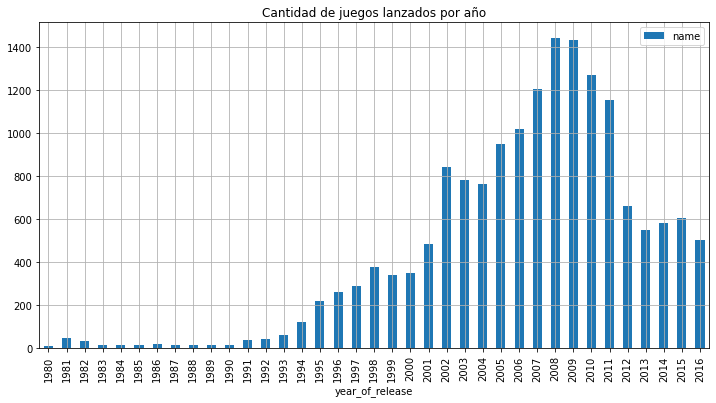

In [ ]:
game_year.plot(kind='bar', figsize=(12,6), grid = True)
plt.title("Cantidad de juegos lanzados por año")
plt.show()

Como se observa en la figura, los años en donde han salido mas videojuegos son 2008 y 2009. A partir del año 1990 ha habido un crecimiento en la creación de videojuegos, pero a partir del año 2009 ha habido un descenso en sus lanzamientos hasta mantenerse  a partir del año 2013 con casi la mitad de videojuegos que salian en el año 2008 y 2009.

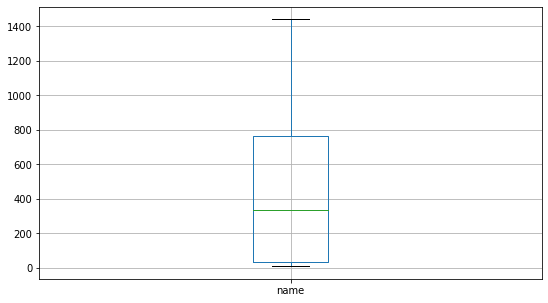

In [ ]:
game_year.boxplot(figsize=(9,5))
plt.show()

### Plataforma

In [ ]:
game_platf = game.pivot_table(index=['platform'], values = ['total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)

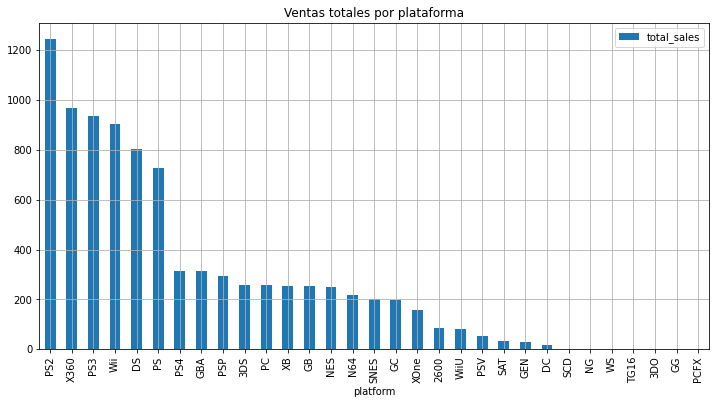

In [ ]:
game_platf.plot(kind='bar', figsize=(12,6), grid = True)
plt.title("Ventas totales por plataforma")
plt.show()

En la gráfica se muestra que la consola que lidera las ventas hasta el año 2016 es PS2 seguida por X360, PS3 y Wii.

In [ ]:
game_platf.describe()

,total_sales
count,31.000000
mean,285.970968
std,346.534958
min,0.030000
25%,22.150000
50%,200.040000
75%,303.650000
max,1246.910000


Se eligen las consolas que han tenido la mayor cantidad de ventas, y se eligen a aquellas que tienen valores en ventas totales superiores a 303.65 porque estas son las que tienen el 75% de las ventas totales.

In [ ]:
game_platf1 = game_platf.query('total_sales >= 303.65')

In [ ]:
game_platf1

,total_sales
platform,
PS2,1246.91
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73


In [ ]:
game_platf_cons1 = game.query('platform == ["DS", "GBA", "PS", "PS2", "Wii"]')
game_platf_cons2 = game.query('platform == ["PS3", "PS4", "X360"]')

In [ ]:
game_platf2 = game_platf_cons1.pivot_table(index=['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc='sum')
game_platf3 = game_platf_cons2.pivot_table(index=['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc='sum')

In [ ]:
game_platf2

total_sales                               
platform                 DS    GBA      PS     PS2     Wii
year_of_release                                           
1985                   0.02    NaN     NaN     NaN     NaN
1994                    NaN    NaN    6.03     NaN     NaN
1995                    NaN    NaN   35.96     NaN     NaN
1996                    NaN    NaN   94.70     NaN     NaN
1997                    NaN    NaN  136.17     NaN     NaN
1998                    NaN    NaN  169.49     NaN     NaN
1999                    NaN    NaN  144.53     NaN     NaN
2000                    NaN   0.07   96.37   39.17     NaN
2001                    NaN  61.53   35.59  166.43     NaN
2002                    NaN  74.16    6.67  208.36     NaN
2003                    NaN  56.67    2.07  193.05     NaN
2004                  17.27  77.91     NaN  211.81     NaN
2005                 130.14  34.53     NaN  160.66     NaN
2006                 119.81   5.46     NaN  103.99  140.19
2007                 147.23   3.40     NaN   76.10  153.41
2008                 145.36    NaN     NaN   53.90  177.68
2009                 119.56    NaN     NaN   26.40  206.97
2010                  85.35    NaN     NaN    6.59  128.67
2011                  26.33    NaN     NaN    0.45   59.79
2012                  11.67    NaN     NaN     NaN   22.94
2013                   1.54    NaN     NaN     NaN    8.59
2014                    NaN    NaN     NaN     NaN    3.75
2015                    NaN    NaN     NaN     NaN    1.14
2016                    NaN    NaN     NaN     NaN    0.18

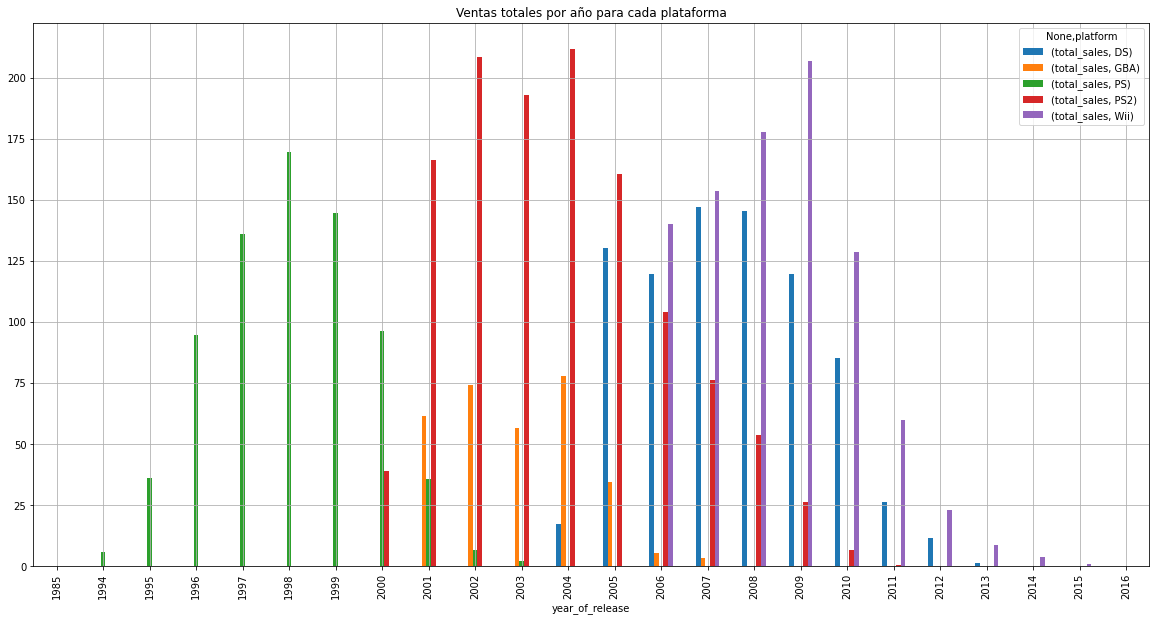

In [ ]:
game_platf2.plot(kind='bar', figsize=(20,10), grid = True)
plt.title("Ventas totales por año para cada plataforma")
plt.show()

In [ ]:
game_platf3

total_sales                
platform                PS3     PS4    X360
year_of_release                            
2005                   0.19     NaN    9.22
2006                  21.44     NaN   51.79
2007                  73.19     NaN   95.41
2008                 118.79     NaN  136.07
2009                 130.93     NaN  120.82
2010                 142.96     NaN  170.55
2011                 157.98     NaN  145.23
2012                 108.28     NaN  100.72
2013                 113.25   25.99   88.58
2014                  47.76  100.00   34.74
2015                  16.82  118.90   11.96
2016                   3.60   69.25    1.52

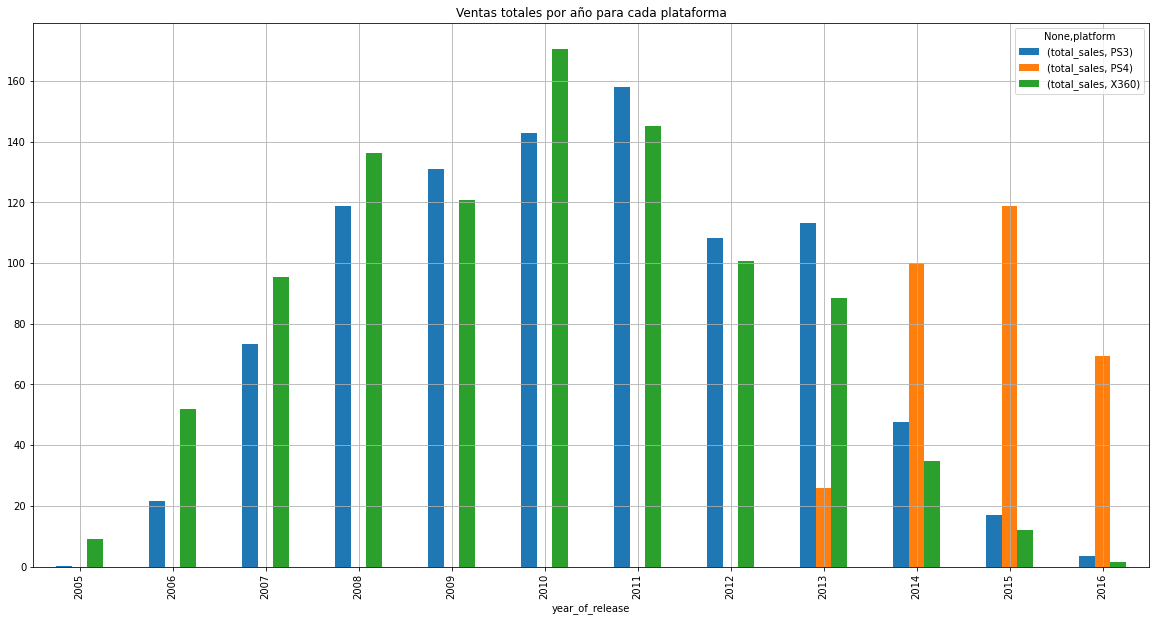

In [ ]:
game_platf3.plot(kind='bar', figsize=(20,10), grid = True)
plt.title("Ventas totales por año para cada plataforma")
plt.show()

Según los gráficos realizados se tienen las siguientes conclusiones con respecto a su popularidad:
- DS: Plataforma que apareció con ventas en sus videojuegos a partir del año 2004, tuvo un pico de popularidad en el año 2007 y 2008, sus ventas fueron bajando hasta desaparecer en el año 2013.
- GBA: Plataforma que apareció con ventas en sus videojuegos a partir del año 2000, tuvo un pico de popularidad en el año 2002 y 2004, sus ventas fueron bajando hasta desaparecer en el año 2007.
- PS: Plataforma que apareció con ventas en sus videojuegos a partir del año 1994, tuvo un pico de popularidad en el año 1998, sus ventas fueron bajando hasta desaparecer en el año 2003.
- PS2: Plataforma que apareció con ventas en sus videojuegos a partir del año 2000, tuvo un pico de popularidad en el año 2002 y 2004, sus ventas fueron bajando hasta desaparecer en el año 2011.
- PS3: Plataforma que apareció con ventas en sus videojuegos a partir del año 2005, tuvo un pico de popularidad en el año 2011, sus ventas han bajado y los últimos datos que se tiene al año 2016, es tener ventas por 3.60.
- Wii: Plataforma que apareció con ventas en sus videojuegos a partir del año 2006, tuvo un pico de popularidad en el año 2009, sus ventas han bajado y los últimos datos que se tiene al año 2016, es tener ventas por 0.18.
- X360: Plataforma que apareció con ventas en sus videojuegos a partir del año 2005, tuvo un pico de popularidad en el año 2010, sus ventas han bajado y los últimos datos que se tiene al año 2016, es tener ventas por 1.52.
- PS4: Plataforma que apareció con ventas en sus videojuegos a partir del año 2013, tuvo un pico de popularidad en el año 2015, sus ventas han bajado y los últimos datos que se tiene al año 2016, es tener ventas por 69.25.

En promedio las consolas tienen un tiempo de duración de 10 años. Desde que apareció la primera consola PS, se demoraron 6 años en sacar nuevas consolas y desde ahí, el tiempo que se demoran en sacar nuevas consolas ha ido disminuyendo. El PS, PS2 y PS3, se han demorado en sacar sus consolas 5 años aprox. cada una, a excepción del PS4, que se demoraron 8 años en sacarlo desde que salió el PS3.

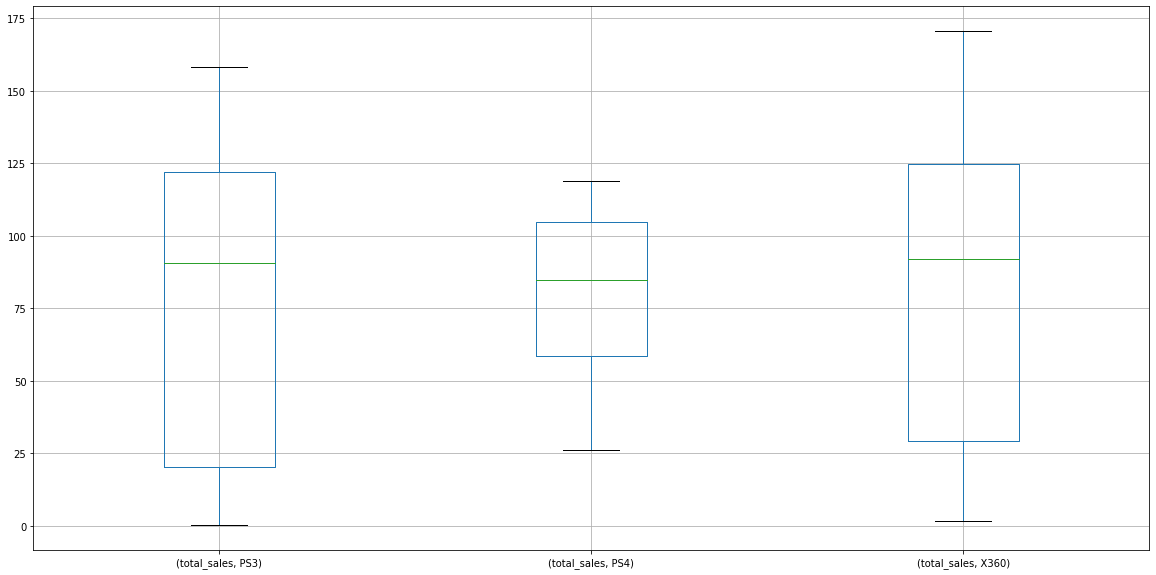

In [ ]:
game_platf3.plot(kind='box', figsize=(20,10), grid = True)
plt.show()

El periodo que se va a tomar datos va a ser 2011 - 2016, porque en el año 2011, las consolas X360 y PS3 han tenido su pico en ventas, según el diagrama de "game_platf3" y PS4 está recién empezando a tener éxito con el lanzamiento de sus videojuegos

Las consolas que han tenido un mayor éxito en ventas y que todavia se encuentran activas con ventas son X360, PS3 y PS4, quiénes han tenido un buen éxito en ventas a partir de su lanzamiento y un paulatino descenso en sus ventas debido al tiempo que llevan en el mercado. PS4 está empezado con su ventas porque apenas lleva 4 años desde su lanzamiento.

## Juegos

In [ ]:
game_platf4 = game.pivot_table(index=['platform','year_of_release'], values = ['total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
game_platf4 = game_platf4.query('year_of_release >= 2011')
game_platf4.head()

total_sales
platform year_of_release             
PS3      2011                  157.98
X360     2011                  145.23
PS4      2015                  118.90
PS3      2013                  113.25
         2012                  108.28

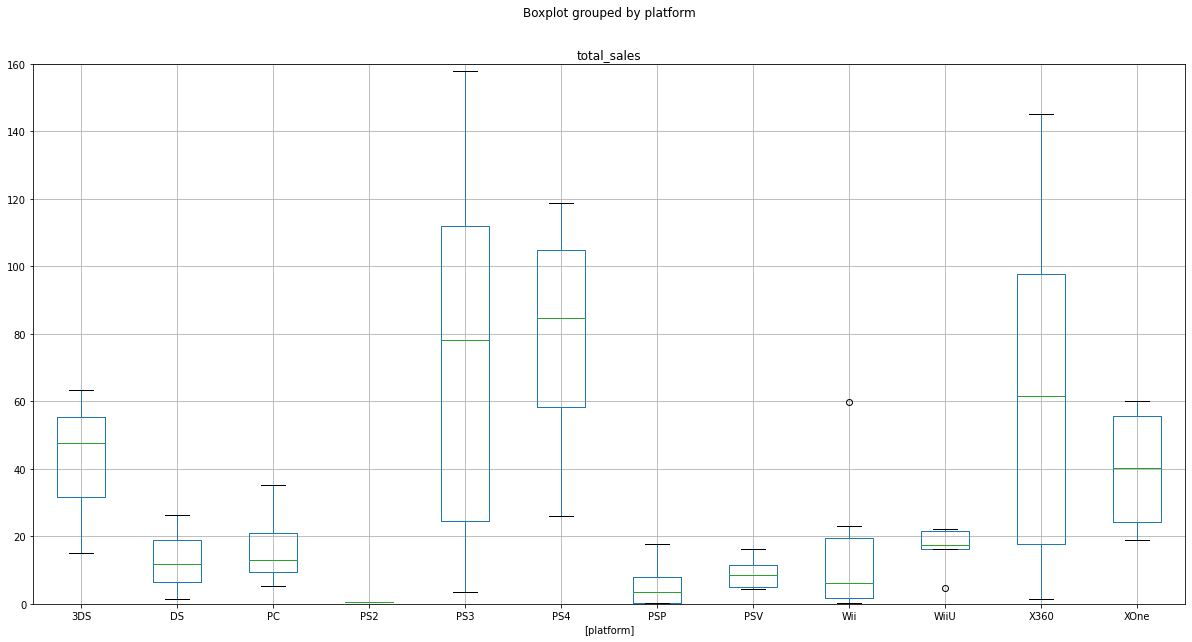

In [ ]:
game_platf4.boxplot(by='platform', figsize=(20,10))
plt.ylim(0,160)
plt.show()

Como se observa en el gráfico, a partir del año 2011, la plataforma con mayor cantidad de ventas es PS3, seguida de X360, PS4, 3DS, los datos son bastante significativos, porque se evidencia que esas plataformas lideran el mercado hasta el año 2016

## Correlación para Critic y User Score

Se realiza la matriz de correlación entre critic_score, user_score y total_sales para determinar la correlación entre estas columnas. La consola elegida para realizar este análisis es el X360

In [ ]:
#Todos los juegos que pertenecen a la plataforma X360
game_x360=game.query('platform == "X360" and year_of_release >= 2011')
game_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16385,Bullet Soul: Tama Tamashii,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16421,DoDonPachi Daifukkatsu: Black Label,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16458,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16492,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01


              critic_score  total_sales  user_score
critic_score      1.000000     0.390195    0.567372
total_sales       0.390195     1.000000    0.039041
user_score        0.567372     0.039041    1.000000


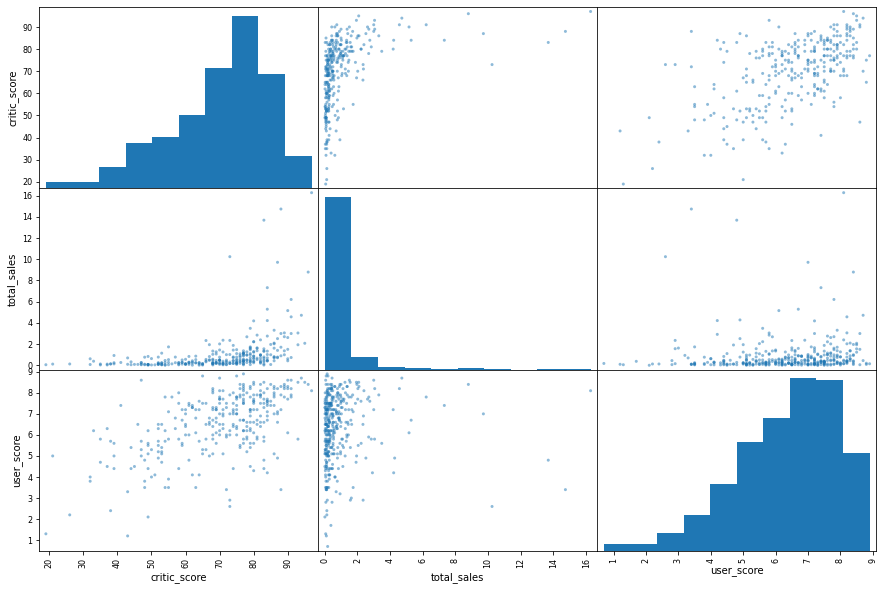

In [ ]:
#Matriz de correlación
game_x360_multi = game_x360.pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])
print(game_x360_multi.corr())
pd.plotting.scatter_matrix(game_x360_multi, figsize=(15,10))
plt.show()

La correlación entre critic_score y total_sales es positiva, aunque débil (0.39), lo que sugiere que en general, los juegos con mejores puntuaciones de los profesionales tienden a venderse mejor, pero la relación no es muy fuerte.
La correlación entre critic_score y user_score es moderada (0.56), lo que indica que hay cierta relación entre las calificaciones de los críticos y las calificaciones de los usuarios.
Finalmente, la correlación entre total_sales y user_score es muy débil (0.039), lo que sugiere que no hay una relación clara entre las ventas totales y las calificaciones de los usuarios.
En general, estos datos sugieren que la variable critic_score tiene la correlación más fuerte con las otras dos variables.

### Relación entre los juegos de X360 y otras plataformas.

Lo primero que se va a realizar es filtrar los datos, en los que solo tengamos las columnas de interés, las cuales son: name, platform y total_sales. Se va a separar en 2 variables diferentes, los juegos que pertenecen a X360 y los juegos que pertenecen a X360 que también las podemos encontrar en otras plataformas.

In [ ]:
game1 = game[['name', 'platform', 'total_sales','year_of_release']]
game_x3601 = game_x360[['name','platform', 'total_sales','year_of_release']]

In [ ]:
game_plat_x360 = pd.merge(game1, game_x3601, on='name')
game_plat_x360 = game_plat_x360.drop(['platform_y','total_sales_y'], axis=1)
game_plat_x360 = game_plat_x360.rename(columns={'platform_x': "platform",'total_sales_x': "total_sales"})

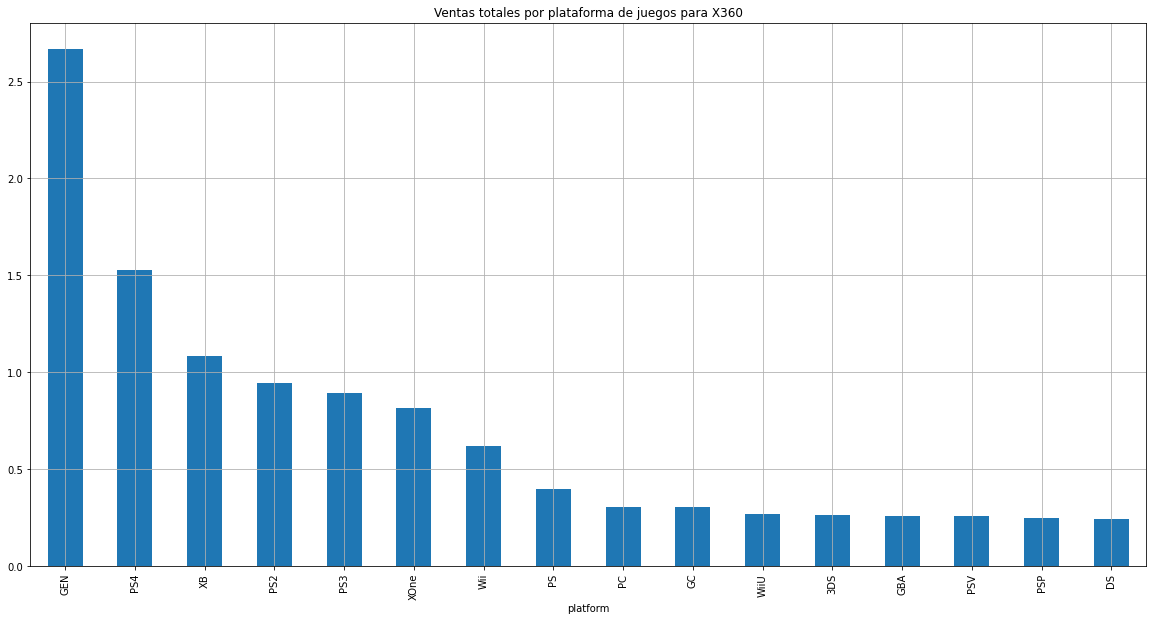

In [ ]:
#Los juegos de X360 que también los encontramos en otras plataformas
game_plat_x360 = game_plat_x360.query('platform != "X360"')
game_plat_x360 = game_plat_x360.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
game_plat_x360.plot(kind='bar', figsize=(20,10), grid = True)
plt.title("Ventas totales por plataforma de juegos para X360")
plt.show()

In [ ]:
#Los juegos de X360
game_plat_x3601 = game_x3601.pivot_table(index='name', values='total_sales', aggfunc='sum')
game_plat_x3601.mean()

total_sales    0.756423
dtype: float64

El promedio de ventas para los juegos de X360 es de 0.76, y hay 6 de 18 consolas que tienen ingresos superiores por esos mismos juegos. De las cuales, la gran mayoria son consolas antiguas, entonces según la gráfica se puede observar que son juegos remasterizados por parte de X360, los cuales primero aparecieron en otras paltaformas y después se sacaron para X360. Por lo tanto X360 no tiene tantos juegos propios que lo mantengan exitoso, sino, son versiones nuevas.

## Géneros mas rentables

Se va a filtrar dos tablas, una en la que consta las ventas totales para cada género y otra que cuente el número de juegos que han salido por plataforma.

In [ ]:
# Ventas totales para cada plataforma a partir del año 2011
game_year = game.query('year_of_release >= 2011')
game_genre = game_year.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

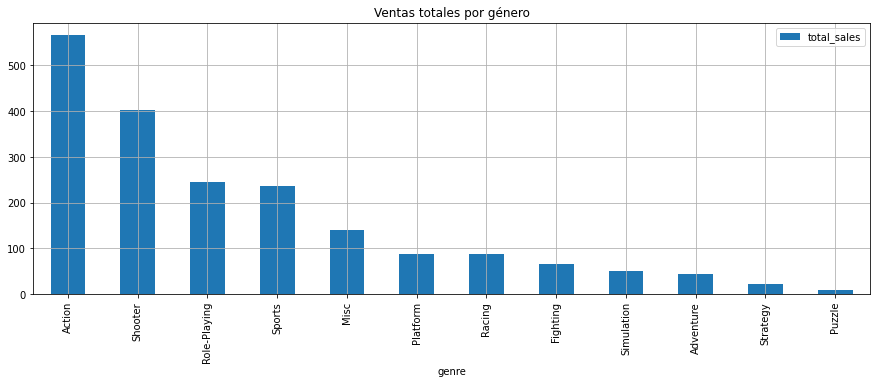

In [ ]:
game_genre.plot(kind='bar', figsize=(15,5), grid = True)
plt.title("Ventas totales por género")
plt.show()

In [ ]:
game_genre.describe()

,total_sales
count,12.000000
mean,163.526667
std,171.126666
min,9.850000
25%,48.955000
50%,88.495000
75%,239.457500
max,564.870000


En base a la tabla mostrada arriba, se podría establecer que un producto es exitoso si ha logrado vender por encima de la media (163.52), y especialmente si ha superado el tercer cuartil (239.46). Entonces para demostrar los géneros que han sido mas exitosos, vamos a tomar como referencia aquellos géneros que han superado en ventas el tercer cuartil (961.33).

In [ ]:
game_genre.query('total_sales >= 239.46')

,total_sales
genre,
Action,564.87
Shooter,402.96
Role-Playing,245.63


Los géneros mas exitosos son Action, Shooter y Role_playing

In [ ]:
# Número de juegos por plataforma
game_genre_count = game_year.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)

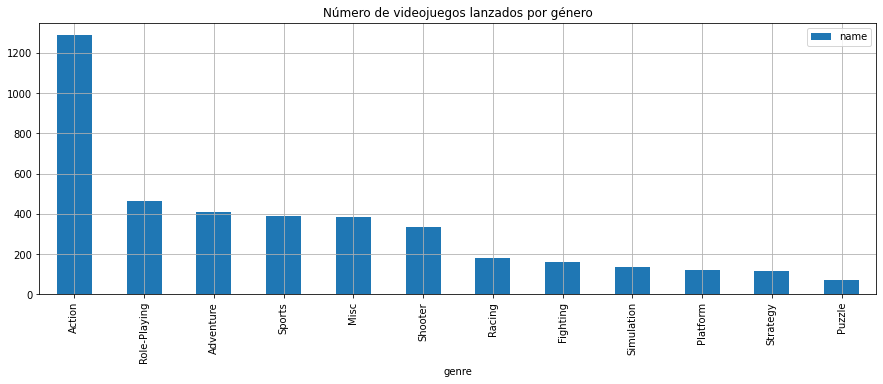

In [ ]:
game_genre_count.plot(kind='bar', figsize=(15,5), grid = True)
plt.title("Número de videojuegos lanzados por género")
plt.show()

In [ ]:
game_genre_count.describe()

,name
count,12.000000
mean,337.583333
std,328.750377
min,71.000000
25%,132.500000
50%,256.000000
75%,395.000000
max,1286.000000


Para demostrar los géneros que han tenido mayor número de videojuegos sacados, vamos a tomar como referencia aquellos que han superado su número al tercer cuartil (395).

In [ ]:
game_genre_count.query('name >= 395')

,name
genre,
Action,1286
Role-Playing,465
Adventure,410


Los géneros con una mayor cantidad de videojuegos son Action, Role_playing y Adventure.
De esta forma podemos encontrar una similitud entre aquellos videojuegos que han sido mas rentables por la parte de ventas y por la parte de videojuegos sacados. Aquellos que comparten esta similitud son Action y Role_playing, quiénes han sido mas éxitosos. Y quiénes no han sido exitosos tanto en ventas como en número de videojuegos sacados son: Puzzle y Strategy.

## Perfil de usuario

Para realizar este análisis, se tomará en cuenta el periodo de interés de 5 años (2011 - 2016) para realizar las predicciones del año 2017.

### NA

In [ ]:
game_na = game[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'rating',]].query('year_of_release >= 2011')
game_na

,name,platform,year_of_release,genre,na_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,M
23,Grand Theft Auto V,X360,2013,Action,9.66,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,M
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,T
...,...,...,...,...,...,...
16548,Strawberry Nauts,PSV,2016,Adventure,0.00,E
16552,Aiyoku no Eustia,PSV,2014,Misc,0.00,E
16555,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,T
16557,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,E


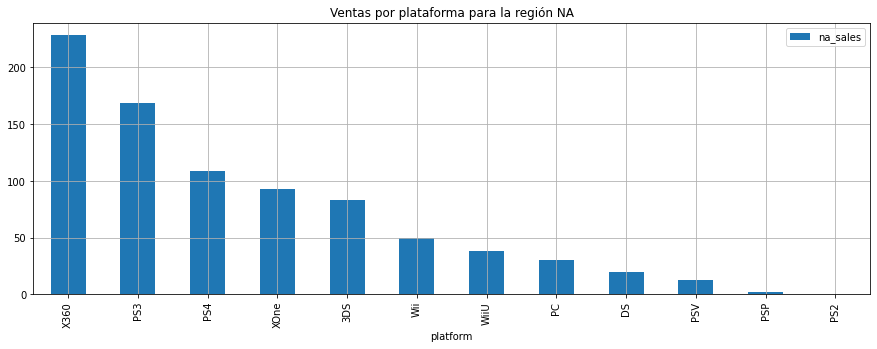

In [ ]:
(game_na
.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por plataforma para la región NA")
plt.show()


Las 5 plataformas principales con respecto a las ventas son: X360, PS3, PS4, XOne y 3DS

In [ ]:
game_na.describe()

,year_of_release,na_sales
count,4051.000000,4051.000000
mean,2013.081708,0.205759
std,1.775690,0.568637
min,2011.000000,0.000000
25%,2011.000000,0.000000
50%,2013.000000,0.040000
75%,2015.000000,0.170000
max,2016.000000,9.660000


Para la región NA en ventas, la media de es igual a 0.21. Los datos están relativamente agrupados y no hay mucha variabilidad en el conjunto de datos, por tal motivo su desviación estandar es igual a 0.56.

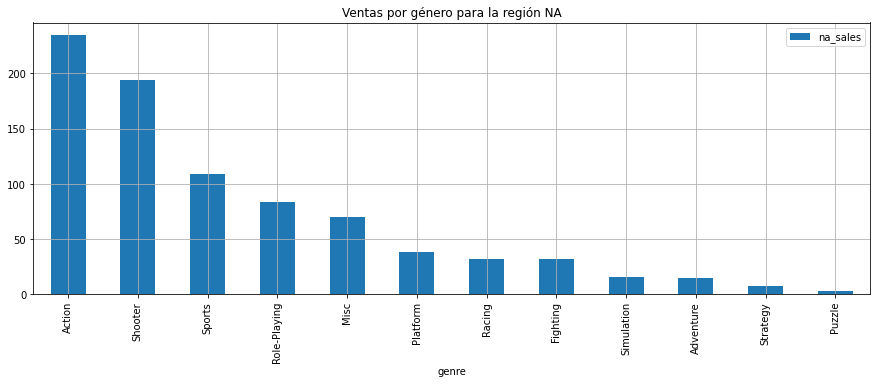

In [ ]:
(game_na
.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por género para la región NA")
plt.show()


Los 5 géneros principales con respecto a las ventas son: Action, Shooter, Sports, Role_playing y Misc. La principal diferencia entre estos géneros radica en la mecánica de juego y en la temática. Mientras que los juegos de acción y Shooter se centran en la lucha y el combate, los géneros Role_playing y Misc son un género de habilidad donde el jugador controla un personaje que debe avanzar a través de un escenario superando diversos obstáculos. Los juegos de deportes, como su nombre indica, se centran en los deportes, y el objetivo principal es ganar el partido o la competición.

In [ ]:
# La clasificación de ESRB afecta a las ventas?
game_na.groupby(['genre','rating'])['na_sales'].sum().sort_values(ascending=False)

genre         rating
Shooter       M         168.36
Action        M         107.52
Sports        E          90.39
Action        T          60.89
              E10+       50.06
Role-Playing  T          41.91
              M          36.54
Misc          E10+       32.24
Platform      E          28.62
Misc          E          28.60
Racing        E          24.47
Fighting      T          22.70
Shooter       T          18.87
Action        E          15.46
Simulation    E          10.60
Sports        E10+        9.73
Platform      E10+        9.31
Sports        T           8.58
Misc          T           8.17
Fighting      M           8.07
Shooter       E10+        7.20
Adventure     M           6.85
              E           6.00
Racing        E10+        3.89
Simulation    T           3.73
Racing        T           3.51
Role-Playing  E           2.80
Strategy      T           2.75
Role-Playing  E10+        2.53
Puzzle        E           2.25
Strategy      E10+        2.05
              E   

Para los principales géneros si afectan las ventas la clasificación, porque como se observa en la tabla anterior, las categorias mas fuertes como M(Mature 17+), estan la gran mayoria al fondo de la tabla con bajas ventas, mientras que la mayoria de juegos con clasificación E(everyone) y T(teen), se encuetran al principio de la tabla. Pero, también hay videojuegos que por su naturaleza tienen una clasificación M, y se encuentran al principio de la tabla como los Shooter y Action.

### UE

In [ ]:
game_ue = game[['name', 'platform','year_of_release','genre', 'eu_sales', 'rating']].query('year_of_release >= 2011')
#game_ue = game.query('year_of_release >= 2011')
game_ue

,name,platform,year_of_release,genre,eu_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,9.09,M
23,Grand Theft Auto V,X360,2013,Action,5.14,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,4.24,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,M
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,T
...,...,...,...,...,...,...
16548,Strawberry Nauts,PSV,2016,Adventure,0.00,E
16552,Aiyoku no Eustia,PSV,2014,Misc,0.00,E
16555,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,T
16557,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,E


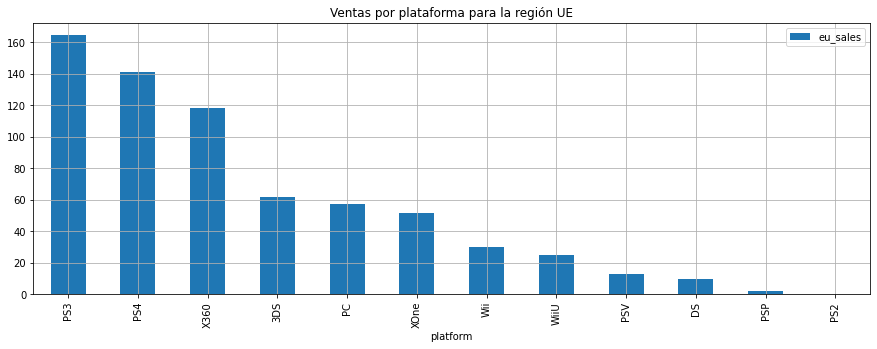

In [ ]:
(game_ue
.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por plataforma para la región UE")
plt.show()

Las 5 plataformas principales con respecto a las ventas son: PS3, PS4, X360, 3DS y PC

In [ ]:
game_ue.describe()

,year_of_release,eu_sales
count,4051.000000,4051.000000
mean,2013.081708,0.166139
std,1.775690,0.481300
min,2011.000000,0.000000
25%,2011.000000,0.000000
50%,2013.000000,0.030000
75%,2015.000000,0.130000
max,2016.000000,9.090000


Para la región UE en ventas, la media de es igual a 0.16. Los datos están relativamente agrupados y no hay mucha variabilidad en el conjunto de datos, por tal motivo su desviación estandar es igual a 0.48.

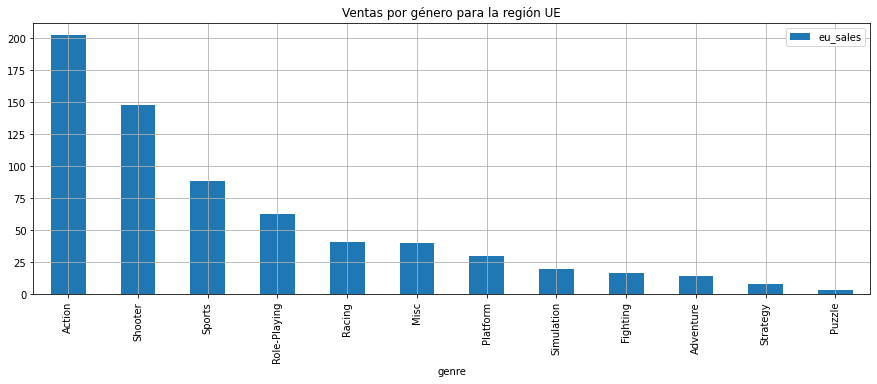

In [ ]:
(game_ue
.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por género para la región UE")
plt.show()


Los 5 géneros principales con respecto a las ventas son: Action, Shooter, Sports, Role_playing y Racing.
La principal diferencia entre estos géneros radica en la mecánica de juego y en la temática. Mientras que los juegos de acción y Shooter se centran en la lucha y el combate, el género Role_playing es un género de habilidad donde el jugador controla un personaje que debe avanzar a través de un escenario superando diversos obstáculos. Los juegos de Sports y Racing, como su nombre indica, se centran en los deportes y carreras de autos, y el objetivo principal es ganar el partido o la competición.

In [ ]:
# La clasificación de ESRB afecta a las ventas?
game_ue.groupby(['genre','rating'])['eu_sales'].sum().sort_values(ascending=False)

genre         rating
Shooter       M         129.55
Action        M          96.54
Sports        E          79.32
Action        T          48.48
              E10+       37.70
Role-Playing  M          31.24
Racing        E          30.02
Role-Playing  T          28.37
Platform      E          21.60
Misc          E          20.56
Action        E          19.20
Misc          E10+       15.69
Simulation    E          13.97
Shooter       T          13.47
Fighting      T          12.74
Platform      E10+        8.12
Adventure     M           6.49
Sports        T           6.39
Racing        T           6.01
Adventure     E           5.49
Shooter       E10+        5.03
Strategy      T           4.76
Simulation    T           4.74
Racing        E10+        4.49
Fighting      M           3.10
Misc          T           3.09
Sports        E10+        2.96
Puzzle        E           2.70
Role-Playing  E10+        1.45
Adventure     E10+        1.38
Role-Playing  E           1.24
Strategy      E10+

Para los principales géneros si afectan las ventas la clasificación, porque como se observa en la tabla anterior, las categorias mas fuertes como M(Mature 17+), estan la gran mayoria a la mitad y al fondo de la tabla con ventas intermedia, mientras que la mayoria de juegos con clasificación E(everyone) y T(teen), se encuetran al principio de la tabla. Al igual de videojuegos que por su naturaleza tienen una clasificación M, y se encuentran al principio de la tabla como los Shooter y Action.

### JP

In [ ]:
game_jp = game[['name', 'platform','year_of_release','genre', 'jp_sales', 'rating']].query('year_of_release >= 2011')
#game_jp = game.query('year_of_release >= 2011')
game_jp

,name,platform,year_of_release,genre,jp_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,M
23,Grand Theft Auto V,X360,2013,Action,0.06,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,0.13,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,M
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,T
...,...,...,...,...,...,...
16548,Strawberry Nauts,PSV,2016,Adventure,0.01,E
16552,Aiyoku no Eustia,PSV,2014,Misc,0.01,E
16555,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,T
16557,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,E


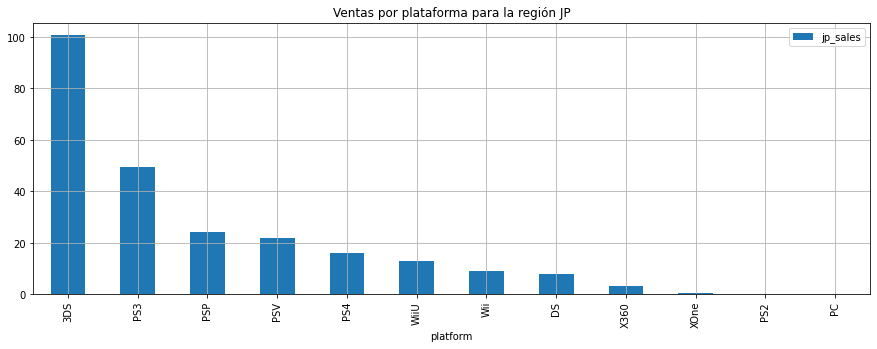

In [ ]:
(game_jp
.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por plataforma para la región JP")
plt.show()


Las 5 plataformas principales con respecto a las ventas son: 3DS, PS3, PSP, PSV y PS4

In [ ]:
game_jp.describe()

,year_of_release,jp_sales
count,4051.000000,4051.000000
mean,2013.081708,0.060704
std,1.775690,0.219533
min,2011.000000,0.000000
25%,2011.000000,0.000000
50%,2013.000000,0.000000
75%,2015.000000,0.050000
max,2016.000000,4.390000


Para la región JP en ventas, la media de es igual a 0.07. Los datos están relativamente agrupados y no hay mucha variabilidad en el conjunto de datos, por tal motivo su desviación estandar es igual a 0.31.

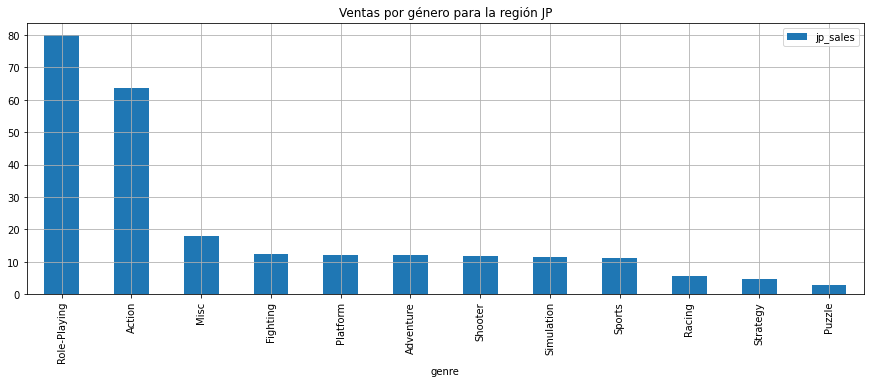

In [ ]:
(game_jp
.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
.plot(kind='bar', figsize=(15,5), grid = True)
)
plt.title("Ventas por género para la región JP")
plt.show()


Los 5 géneros principales con respecto a las ventas son: Role_Playing, Misc, Fighting, Platform.
La principal diferencia entre estos géneros radica en la mecánica de juego y en la temática. Mientras que los juegos de acción se centran en la lucha y el combate, los géneros Role_playing, Misc y Platform son parecidos y son un género de habilidad donde el jugador controla un personaje que debe avanzar a través de un escenario superando diversos obstáculos. Los juegos de Fighting, como su nombre indica, se centran en los deportes, y el objetivo principal es ganar el partido o la competición.



In [ ]:
# La clasificación de ESRB afecta a las ventas?
game_jp.groupby(['genre','rating'])['jp_sales'].sum().sort_values(ascending=False)

genre         rating
Role-Playing  T         70.87
Action        T         43.94
Misc          E         15.17
Fighting      T         11.64
Action        M         11.57
Adventure     E         11.02
Sports        E         10.99
Platform      E         10.54
Simulation    E         10.52
Shooter       M          9.10
Racing        E          5.32
Action        E          5.22
Role-Playing  M          4.86
Strategy      T          4.44
Action        E10+       2.90
Puzzle        E          2.36
Role-Playing  E10+       2.27
              E          1.87
Shooter       E10+       1.71
Platform      E10+       1.56
Misc          E10+       1.27
              T          1.21
Shooter       T          1.11
Adventure     M          0.93
Simulation    T          0.59
Fighting      M          0.57
Simulation    E10+       0.43
Strategy      E10+       0.34
Puzzle        T          0.30
              E10+       0.25
Racing        E10+       0.21
Misc          M          0.20
Fighting      E10+ 

Para los principales géneros si afectan las ventas la clasificación, porque como se observa en la tabla anterior, las categorias mas fuertes como M(Mature 17+), estan la gran mayoria al fondo de la tabla con bajas ventas, mientras que la mayoria de juegos con clasificación E(everyone) y T(teen), se encuetran al principio de la tabla con ventas altas.

### Conclusión

La región NA y UE tienen gustos similares con respecto a la consola (X360, PS3, PS4 y 3DS), de igual forma con su género preferido (Action, Sports, Shooter, Role_playing), son un poco diferentes a la región JP, quiénes tienen gustos mas orientados a las consolas de Sony y géneros comparten gustos similares entre las 3 regiones. Los datos de las ventas están relativamente agrupados y no hay mucha variabilidad en el conjunto de datos. Entonces para el año 2017, se puede enfocar las estrategias de marketing hacia estas consolas donde comparten las 3 regiones gustos similares y de igual forma hacia estos Géneros.

## Hipótesis

Se va a crear dos variables que contengan los datos que vamos a probar en la hipótesis:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
game_xbox_pc = game[['platform','user_score']]
xbox = game_xbox_pc.query('platform == "XOne"').dropna()
xbox = xbox.drop(['platform'], axis=1)
pc = game_xbox_pc.query('platform == "PC"').dropna()
pc = pc.drop(['platform'], axis=1)

In [ ]:
# Prueba de Levene centrada en la mediana

xbox1 = xbox['user_score']
pc1 = pc['user_score']

stat, p = levene(xbox1, pc1, center='median')
p

0.2831544426559251

En este caso, se usa equal_var = True

In [ ]:
# Prueba de hipótesis

# ho = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
# h1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var = True )
print('p-value:', results.pvalue)

if (results.pvalue < alpha).any():
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

NameError: name 'st' is not defined

Según el análisis de la prueba de hipótesis, se rechaza la hipótesis nula y se llega a concluir que las calificaciones promedio de los usuarios para las plataformas xbox one y pc no son iguales.
Se uso este tipo de prueba de hipótesis porque se necesitó comparar las medias de dos poblaciones estadísticas diferentes.

In [ ]:
game_act_sp = game[['genre','user_score']]
action = game_act_sp.query('genre == "Action"').dropna()
action = action.drop(['genre'], axis=1)
sports = game_act_sp.query('genre == "Sports"').dropna()
sports = sports.drop(['genre'], axis=1)

In [ ]:
# Prueba de Levene centrada en la mediana

action1 = action['user_score']
sports1 = sports['user_score']

stat, p = levene(action1, sports1, center='median')
p

0.00011912052444924788

En este caso, se usa equal_var = False

In [ ]:
# Prueba de hipótesis

# ho = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# h1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales (son diferentes).


alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False )
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: [0.09344255]
No rechazamos la hipótesis nula


Según el análisis de la prueba de hipótesis, se acepta la hipótesis nula y se llega a concluir que las calificaciones promedio de los usuarios para los géneros de acción y deporte son iguales.
Se uso este tipo de prueba de hipótesis porque se necesitó comparar las medias de dos poblaciones estadísticas diferentes.

## Conclusión final

Para el proyecto integrador se realizó la carga del dataset y las librerias. Se revisó si habia columnas con datos ausentes o que se tenian que cambiar y lo primero que se hizo fue cambiar el nombre de las columnas a minúsculas, se imputaron los datos de las filas faltantes con el nombre, y año de lanzamiento dependiendo de cuales eran las necesidades de cada columna hasta obtener un dataframe sin valores nulos. Las columnas user_score y critic_score no se realizaron cambios debido a que son sensibles a cualquier variación que hagamos con la imputación. Se revisaron las ventas totales para las 3 regiones NA, UE y JP, a través de los años, en donde se observó que hubo un ascenso paulatino en ventas hasta alcanzar su máximo pico en los años 2008 y 2009. También se realizó el mismo análisis para cada plataforma, viendo que PS3 lideró las ventas totales. Las 3 plaformas con mas ventas desde el año 2011 hasta el 2016 fueron: PS3, PS4 y X360, y el tiempo de duración promedio de cada plataforma fue de 10años. Se realizó un análisis para la plataforma X360, en donde la venta de sus juegos se comparó con otras consolas llegando a observar que sus juegos tienen mas éxito en otras plataformas, pero de la misma marca Sony. Los géneros mas rentables para las 3 regiones fueron: Action, Sports, Shooter, Role_playing y las plataformas mas exitosas para las 3 regiones fueron: X360, PS3, PS4 y 3DS, a las cuales se tiene que aplicar las estrategias de marketing para el año 2017.